In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pyswmm import Simulation, Nodes, Links

/Users/niranjan/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/_1/mh7vhs1d5zz3475l0s3f31ww0000gn/T/ipykernel_7275/3710545589.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should

In [2]:
from swmm_api import __version__
print('swmm_api version:', __version__)

swmm_api version: 0.4.25


In [3]:
from swmm_api.input_file import read_inp_file, SwmmInput, section_labels as sections
from swmm_api.input_file.sections import Outfall,Coordinate,SubCatchment,Conduit,Weir,Junction, Storage, Curve
from swmm_api.input_file.helpers import InpSection

Index(['x0', 'y0', 'x1', 'y1', 'name', 'elev_in', 'elev_out', 'length',
       'junc_in', 'junc_out', 'roughness', 'elev_in_of', 'elev_ou_of', 'Link',
       'Cshape', 'Geom1', 'Geom2', 'Geom3', 'Geom4', 'Barrels', 'Culvert',
       'geometry'],
      dtype='object')
0     0.015
1     0.015
2     0.015
3     0.015
4     0.015
5     0.015
6     0.015
7     0.015
8     0.015
9     0.015
10    0.015
11    0.015
12    0.015
Name: roughness, dtype: float64


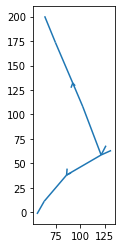

In [22]:
gdf_conduits = gpd.read_file('conduits.shp')
gdf_conduits.plot()
print(gdf_conduits.columns)
print(gdf_conduits['roughness'])

In [5]:
help(Conduit.__init__)

Help on function __init__ in module swmm_api.input_file.sections.link:

__init__(self, name, from_node, to_node, length, roughness, offset_upstream=0, offset_downstream=0, flow_initial=0, flow_max=nan)
    Conduit link information.
    
    Args:
        name (str): Name assigned to conduit link.
        from_node (str): Name of upstream node.
        to_node (str): Name of downstream node.
        length (float): Conduit length (ft or m).
        roughness (float): Value of n (i.e., roughness parameter) in Manning’s equation.
        offset_upstream (float): offset of upstream end of conduit invert above the invert elevation of its
                                 upstream node (ft or m).
        offset_downstream (float): Offset of downstream end of conduit invert above the invert elevation of its
                                   downstream node (ft or m).
        flow_initial (float): Flow in conduit at start of simulation (flow units) (default is 0).
        flow_max (float): Max

In [6]:
conduit_section = Conduit.create_section(gdf_conduits[['name', 'junc_in', 'junc_out', 'length', 'roughness', 'elev_in_of', 'elev_ou_of']].values)

In [7]:
from swmm_api import SwmmInput
inp = SwmmInput()

In [8]:
inp.add_new_section(conduit_section)

In [9]:
from swmm_api.input_file.sections import Vertices

inp.add_new_section(Vertices.create_section_from_geoseries(gdf_conduits.set_index('name').geometry))

In [10]:
from swmm_api.input_file.sections import Tag

gdf_conduits['kind'] = Tag.TYPES.Link

# We create just for this example new tags:
gdf_conduits['tag'] = f'Tag for {Tag.TYPES.Link} ' + gdf_conduits["name"]

inp.add_new_section(Tag.create_section(gdf_conduits[['kind', 'name', 'tag']].values))

In [11]:
inp.write_file('GisToSWMM5_example.inp')

'GisToSWMM5_example.inp'

In [12]:
help(Junction.__init__)

Help on function __init__ in module swmm_api.input_file.sections.node:

__init__(self, name, elevation, depth_max=0, depth_init=0, depth_surcharge=0, area_ponded=0)
    Junction node information.
    
    Args:
        name (str): Name assigned to junction node.
        elevation (float): Elevation of junction invert (ft or m).
        depth_max (float): Depth from ground to invert elevation (ft or m) (default is 0).
        depth_init (float): Water depth at start of simulation (ft or m) (default is 0).
        depth_surcharge (float): Maximum additional pressure head above ground elevation that manhole junction can sustain under surcharge conditions (ft or m) (default is 0).
        area_ponded (float): Area subjected to surface ponding once water depth exceeds :attr:`Junction.depth_max` + :attr:`Junction.depth_surcharge` (ft2 or m2) (default is 0).



In [23]:
help(Outfall.__init__)

Help on function __init__ in module swmm_api.input_file.sections.node:

__init__(self, name, elevation, kind, *args, data=nan, has_flap_gate=False, route_to=nan)
    Outfall node information.
    
    Args:
        name (str): name assigned to outfall node.
        elevation (float): invert elevation (ft or m).
        kind (str): one of ``FREE``, ``NORMAL``, ``FIXED``, ``TIDAL``, ``TIMESERIES`` (or use :attr:`Outfall.TYPES`)
        *args: -Arguments below- (for automatic input file reader.)
        data (float | str): one of the following
    
            - Stage (float): elevation of fixed stage outfall (ft or m). (for ``FIXED``-Type)
            - Tcurve (str): name of curve in [``CURVES``] section (:class:`Curve`) containing tidal height (i.e., outfall stage) v. hour of day over a complete tidal cycle. (for ``TIDAL``-Type)
            - Tseries (str): name of time series in [``TIMESERIES``] section (:class:`Timeseries`) that describes how outfall stage varies with time. (for ``TIM

In [13]:
help(Coordinate.__init__)

Help on function __init__ in module swmm_api.input_file.sections.node_component:

__init__(self, node, x, y)
    X,Y coordinates for nodes.
    
    Args:
        node (str): name of node.
        x (float): horizontal coordinate relative to origin in lower left of map.
        y (float): vertical coordinate relative to origin in lower left of map.



In [14]:
help(Storage.__init__)

Help on function __init__ in module swmm_api.input_file.sections.node:

__init__(self, name, elevation, depth_max, depth_init, kind, *args, data=None, depth_surcharge=0.0, frac_evaporation=0.0, suction_head=nan, hydraulic_conductivity=nan, moisture_deficit_init=nan)
    Storage node information.
    
    Args:
         name (str): Name assigned to storage node.
         elevation (float): Node's invert elevation (ft or m).
         depth_max (float): Maximum water depth possible (ft or m).
         depth_init (float): Water depth at the start of the simulation (ft or m).
         kind (str): One of :attr:`Storage.TYPES` (``TABULAR`` | ``FUNCTIONAL``) or :attr:`Storage.SHAPES` ( ``CYLINDRICAL`` | ``CONICAL`` | ``PARABOLOID`` | ``PYRAMIDAL``)
         *args: -Arguments below- (for automatic input file reader.)
         data (str | list):
    
            - :obj:`str`: name of curve in [``CURVES``] section with surface area (ft2 or m2) as a function of depth (ft or m) for ``TABULAR`` geom

In [15]:
help(Conduit.__init__)

Help on function __init__ in module swmm_api.input_file.sections.link:

__init__(self, name, from_node, to_node, length, roughness, offset_upstream=0, offset_downstream=0, flow_initial=0, flow_max=nan)
    Conduit link information.
    
    Args:
        name (str): Name assigned to conduit link.
        from_node (str): Name of upstream node.
        to_node (str): Name of downstream node.
        length (float): Conduit length (ft or m).
        roughness (float): Value of n (i.e., roughness parameter) in Manning’s equation.
        offset_upstream (float): offset of upstream end of conduit invert above the invert elevation of its
                                 upstream node (ft or m).
        offset_downstream (float): Offset of downstream end of conduit invert above the invert elevation of its
                                   downstream node (ft or m).
        flow_initial (float): Flow in conduit at start of simulation (flow units) (default is 0).
        flow_max (float): Max

In [16]:
help(Vertices.__init__)

Help on function __init__ in module swmm_api.input_file.sections.link_component:

__init__(self, link, vertices)
    X,Y coordinates for each interior vertex of polyline links.
    
    Args:
        link (str): Name of link.
        vertices (list[list[float, float]]): Vertices relative to origin in lower left of map.
    
            - x_coord: horizontal (x-)coordinate
            - y_coord: vertical (y-)coordinate



In [17]:
help(Curve.__init__)

Help on function __init__ in module swmm_api.input_file.sections.others:

__init__(self, name, kind, points)
    X-Y tabular data referenced in other sections.
    
    Args:
        name (str): Name assigned to table.
        kind (str): One of ``STORAGE`` / ``SHAPE`` / ``DIVERSION`` / ``TIDAL`` / ``PUMP1`` / ``PUMP2`` / ``PUMP3`` / `PUMP4`` / ``RATING`` / ``CONTROL`` (:attr:`Curve.TYPES`).
        points (list[list[float, float]]): tuple of X-value (an independent variable) and the corresponding Y-value (a dependent variable)

